<a href="https://colab.research.google.com/github/OmerRosen/Kaggle/blob/main/IMDB_2022_Hit_or_Flop_Model_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
skip_slow_processes = False

base_folder_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project"

# Model Exploring - Useful Functions

Model Exploring</b><br>
In this section we will train and fine-turn various models to achieve the best prediction on our test dataset.

## Importing libraries

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import math
import warnings
import itertools
from timeit import default_timer as timer

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup 
import re
import time
import progressbar

from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import seaborn as sns
import inspect


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error
import shap


# Load Processed Dataset

In [4]:
binary_columns = ['covid_lockdown','genere_action', 'genere_adventure', 'genere_fantasy', 'language_english', 'genere_comedy', 'language_mandarin', 'genere_horror', 'genere_thriller', 'language_spanish', 'genere_crime', 'genere_drama', 'language_russian', 'genere_history', 'language_italian', 'language_french', 'genere_romance', 'genere_mystery', 'genere_sci-fi', 'language_japanese', 'genere_animation', 'language_german', 'language_latin', 'language_arabic', 'genere_biography', 'language_hindi', 'language_chinese', 'genere_music', 'genere_sport', 'genere_family', 'genere_musical', 'genere_war', 'genere_western', 'was_budget_missing', 'rating_catg_G', 'rating_catg_PG-13', 'rating_catg_R', 'rating_catg_Unrated', 'release_month_April', 'release_month_August', 'release_month_December', 'release_month_February', 'release_month_January', 'release_month_July', 'release_month_June', 'release_month_March', 'release_month_May', 'release_month_November', 'release_month_October', 'release_month_September', 'budget_currency_CAD', 'budget_currency_GBP', 'budget_currency_USD']
numerical_columns = ['budget_usd', 'runtime_min', 'title_length', 'movie_desc_length', 'cast_count_total', 'cast_count_director', 'cast_count_writer', 'cast_count_cast', 'cast_count_producer', 'cast_count_composer', 'cast_count_cinematographer', 'cast_count_editor', 'cast_count_casting_director', 'cast_count_production_designer', 'cast_count_art_director', 'cast_count_set_decorator', 'cast_count_costume_designer', 'cast_count_production_manager', 'cast_count_special_effects', 'cast_count_visual_effects', 'cast_count_animation_department', 'cast_count_casting_department', 'cast_count_costume_department', 'cast_count_editorial_department', 'cast_count_location_management', 'cast_count_music_department', 'cast_count_script_department', 'cast_count_transportation_department', 'cast_count_miscellaneous', 'cast_count_thanks', 'genre__count', 'language__count', 'main_crew_count', 'crew_age_avg', 'crew_age_missing', 'crew_female_count', 'crew_lgbt_count', 'crew_prestige_wins', 'crew_prestige_nominations', 'crew_awards_nominations']


In [5]:


file_path = os.path.join(base_folder_path,"3_processed_imdb_dataset.csv")
X = pd.read_csv(file_path, index_col="movie_id")
X

,covid_lockdown,genere_action,genere_adventure,genere_fantasy,language_english,genere_comedy,language_mandarin,genere_horror,genere_thriller,language_spanish,...,release_month_November,release_month_October,release_month_September,budget_currency_CAD,budget_currency_GBP,budget_currency_USD,y_opening_weekend_us_canada,y_gross_us_canada,y_metascore,y_user_rating
movie_id,,,,,,,,,,,,,,,,,,,,,
tt1630029,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,134100226.0,683890614.0,67.0,7.7
tt6710474,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,501305.0,77191785.0,81.0,7.9
tt9764362,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,1,9004957.0,38501125.0,71.0,7.2
tt7888964,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,6820100.0,27568035.0,64.0,7.4
tt10640346,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,3603368.0,15351455.0,60.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt5731746,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,1,NaN,NaN,NaN,4.5
tt10958102,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,NaN,NaN,NaN,4.9
tt17291716,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,NaN,NaN,NaN,5.0


In [6]:
y_opening_weekend_us_canada_raw = X['y_opening_weekend_us_canada']
y_gross_us_canada_raw = X['y_gross_us_canada']
y_metascore_raw = X['y_metascore'] 
y_user_rating_raw = X['y_user_rating']

X_ohe_reduced = X[binary_columns+numerical_columns].copy()

List of models and hyper-parameters that we would like to examine:

## Function: Construct Hyper Parameter table:

The function is meant to iterate over our list of models, match them with the hyper-parameters relevant to them and provide a row for each model-parameter-combination.:<br>

In [7]:
all_model_types = {'LinearRegression':LinearRegression()
                  ,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

Since different models have different hyper-parameters, we have composed a list of all parameters across our models and the values for each hyper parameter we would like to explore.

In [8]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1],
    'n_estimators':[300]
    }

if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [9]:
# get lists and output a dict of combinations:

def create_combination_dict(classifierName,parametersOfValue):
    prop_combinations = list(itertools.product(*(parametersOfValue[Name] for Name in parametersOfValue)))
    combinationsDict ={}
    for i,item in enumerate(prop_combinations):
        modelTempName = "%s_%s"%(classifierName,i)
        #print(modelTempName)
        combinationsDict[modelTempName]={'model_type':classifierName}
        for j,colName in enumerate(parametersOfValue.keys()):
            combinationsDict[modelTempName][colName]=item[j]
    
    
    return combinationsDict

<br>The get_hyperparameter_combinations_per_classifier function receives a classifier and creates n rows of hyper-parameter combinations (Based on parametersOfValue list)

In [10]:
def get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue):

    # Extract the hyper-parameters from our selected model:
    paramList = regression_model.get_params()

    classifierParametsOfValue = {}
    
    # Iterate over the parameters and match them to the parameter of value list:
    for param in paramList:
        if param in parametersOfValue.keys():
            classifierParametsOfValue[param]=parametersOfValue[param]

    # Convert list of hyper-parameters into a dictionary of parameter-combination
    combinationsDict_ForModel = create_combination_dict(classifierName,classifierParametsOfValue)

    relevantParametersForModel = combinationsDict_ForModel[list(combinationsDict_ForModel.keys())[0]].keys()
    print('Model Type: %s - %s hyper-parameter combinations'%(classifierName,len(combinationsDict_ForModel)))
    
    return combinationsDict_ForModel


### --------------------------------------------------------------------------------------------------------------------###
#Example run:


classifierName,regression_model = ('LinearRegression',LinearRegression())
combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
pd.DataFrame(combinationsDict_ForModel).T.head(10)

Model Type: LinearRegression - 2 hyper-parameter combinations


,model_type,fit_intercept
LinearRegression_0,LinearRegression,True
LinearRegression_1,LinearRegression,False


<br>We then over our list of model, and for each model retrieve a list of all available hyper-parameter combinations and append them to dictionary

In [11]:
def get_all_model_combinations(dict_of_models,parametersOfValue):
  all_model_combinations = {}

  for classifierName,regression_model in dict_of_models.items():
      #print(classifierName,regression_model)
      combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
      #print(combinationsDict_ForModel)
      all_model_combinations.update(combinationsDict_ForModel)

  all_model_combinations_df = pd.DataFrame(all_model_combinations).T
  return all_model_combinations_df

all_model_combinations_df = get_all_model_combinations(all_model_types,parametersOfValue)

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 5 hyper-parameter combinations
Model Type: BaggingRegressor  - 1 hyper-parameter combinations
Model Type: RandomForestRegressor - 5 hyper-parameter combinations
Model Type: AdaBoostRegressor - 3 hyper-parameter combinations
Model Type: XGBRegressor  - 15 hyper-parameter combinations


<br>Our final result is a data frame containing all the model types and their hyper-parameters that we will use in our test.

In [12]:
print(f'There are {all_model_combinations_df.shape[0]} different model combinations for us to test')
all_model_combinations_df

There are 31 different model combinations for us to test


,model_type,fit_intercept,max_depth,random_state,n_estimators,learning_rate
LinearRegression_0,LinearRegression,True,NaN,NaN,NaN,NaN
LinearRegression_1,LinearRegression,False,NaN,NaN,NaN,NaN
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1,NaN,NaN
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,4,1,NaN,NaN
DecisionTreeRegressor_2,DecisionTreeRegressor,NaN,5,1,NaN,NaN
DecisionTreeRegressor_3,DecisionTreeRegressor,NaN,80,1,NaN,NaN
DecisionTreeRegressor_4,DecisionTreeRegressor,NaN,100,1,NaN,NaN
BaggingRegressor _0,BaggingRegressor,NaN,NaN,1,1500,NaN
RandomForestRegressor_0,RandomForestRegressor,NaN,3,1,1500,NaN
RandomForestRegressor_1,RandomForestRegressor,NaN,4,1,1500,NaN


## Function: Build and fit model for each record

In [13]:
import inspect

def run_various_models_return_results(all_model_combinations_df, dict_of_models, use_cross_validate = True, limit_features_list=None):
  dict_of_fitted_models = {}

  if limit_features_list is None:
    cols_to_use = list(x_train_scaled.columns)
  else:
    cols_to_use = limit_features_list


  num_of_model_combinations = all_model_combinations_df.shape[0]

  for i,model_row in enumerate(all_model_combinations_df.T.items()):
      
      try:
        start = timer()
        
        # Take existing model and set it hyper parameters based on instructions:
        model_name = model_row[0]
        model_type = model_row[1][0]
        regression_model = clone(dict_of_models[model_type])
        model_props = regression_model.get_params()
        
        
        model_properties_instructions = model_row[1][1:]
        #try:
        #  if math.isnan(model_properties_instructions.get('estimator')):
        #    model_properties_instructions['estimator'] = None      
        #except:
        #  pass
        
        for prop_instruction in model_properties_instructions.index:
            if (prop_instruction in list(model_props.keys())):
                model_props[prop_instruction]=model_properties_instructions[prop_instruction]
                
        regression_model.set_params(**model_props)
        
        #print(f"Model Name: {model_name} - {regression_model}")
        if use_cross_validate == True:
          cross_val = cross_validate(regression_model, x_train_scaled[cols_to_use], y_train, cv=3, scoring='r2', return_train_score=True)
        
          train_score = (np.mean(cross_val['train_score']))
          val_score = (np.mean(cross_val['test_score']))
        else:
          val_score = None
        
        # Fit on entire training data
        regression_model.fit(x_train_scaled[cols_to_use], y_train)
        test_score = regression_model.score(x_test_scaled[cols_to_use],y_test)
        train_score = regression_model.score(x_train_scaled[cols_to_use],y_train)

        
        all_model_combinations_df.at[model_name,'train_score']=train_score
        all_model_combinations_df.at[model_name,'val_score']=val_score
        all_model_combinations_df.at[model_name,'test_score_r2']=test_score
        
        yhat= regression_model.predict(x_test_scaled[cols_to_use])
        mse = mean_squared_error(y_test, yhat)
        all_model_combinations_df.at[model_name,'test_score_mse']=mse
        all_model_combinations_df.at[model_name,'test_score_rmse']=np.sqrt(mse)
            
        
        all_model_combinations_df.at[model_name,'train_size']=x_train_scaled.shape[0]
        all_model_combinations_df.at[model_name,'test_size']=x_test_scaled.shape[0]
        all_model_combinations_df.at[model_name,'feature_n']=len(cols_to_use)
            
        
        end = timer()
        run_time_secs = round(end - start,4)
        all_model_combinations_df.at[model_name,'run_time']=run_time_secs
        
        print(f"Model #{i+1} of {num_of_model_combinations}\nModel Name: {model_name}\nModel Props: {model_props}\nTrain_score: {round(train_score,3)} / Test_score: {round(test_score,3)}.\n")
        
        dict_of_fitted_models[model_name] = regression_model
      except Exception as ex:
        print(f"Failed to fit model. {model_row}.\nException: {ex}")
        all_model_combinations_df.at[model_name,'train_score']=0
        all_model_combinations_df.at[model_name,'val_score']=0
        all_model_combinations_df.at[model_name,'test_score_r2']=0

      
  print("\nFinished Run")
  return all_model_combinations_df.sort_values(by='test_score_r2', ascending=False) , dict_of_fitted_models

In [14]:
def is_nan(obj):
    try:
        return math.isnan(float(obj))
    except (TypeError, ValueError):
        return False

obj = "not a number"

if is_nan(obj):
    print("The object is NaN")
else:
    print("The object is not NaN")

The object is not NaN


## Function: Get Model's Desc

In [15]:
def get_model_desc(model_combinations_output):
  string = ""
  output_desc=""
  count = 1
  for key, val in model_combinations_output.items():
    
    cols_to_ignore = ['train_score','val_score','test_score_r2','test_score_mse','test_score_rmse','train_size','test_size','run_time','feature_n','random_state']
    should_be_ignored = is_nan(val) or key in cols_to_ignore or val is None or val == False or val == 0
    #print(key, val,should_be_ignored)
    if not should_be_ignored:
      string += f"'{key}':{val} "
    
      if count%2==0:
        string += "\n"
      
      count+=1

    if key in ('train_score','test_score_r2'):
      output_desc += f"'{key}':{np.round(val,3)} "


  return(f"{string}\n{output_desc}")

In [16]:
def get_model_desc_single_model(model):
  string = ""
  count = 1
  for i, (key, val) in enumerate(model.get_params().items()):
    
    cols_to_ignore = ['random_state']
    should_be_ignored = is_nan(val) or key in cols_to_ignore or val is None or val == False or val == 0
    #print(key, val,should_be_ignored)
    if not should_be_ignored:
      string += f"'{key}':{val} "
    
      if count%3==0:
        string += "\n"
      
      count+=1

  #print(string)
  return(f"{string}")

## Function: Plot Test Results

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_model_preformence(model_combinations_output, dict_of_fitted_models, plot_per_row=2):


  n_plots = model_combinations_output.shape[0]
  n_row = math.ceil(n_plots/plot_per_row)
  fig, axes = plt.subplots(n_row, plot_per_row, figsize=(6 * plot_per_row,6 * n_row))

  for i,model_name in enumerate(model_combinations_output.index):

    fitted_model = dict_of_fitted_models[model_name] 
    model_desc = get_model_desc(model_combinations_output.loc[model_name])

    fitted_model.fit(x_train_scaled, y_train.ravel())

    # Make predictions
    y_pred = fitted_model.predict(x_test_scaled)

    #ax = axes[i] if n_plots > 1 else axes
    ax = fig.add_subplot(n_row, plot_per_row,i+1)
    ax.scatter(y_test, y_pred)
    ax.set_title(model_desc, fontsize=13)
    ax.set_xlabel('True values')
    ax.set_ylabel('Predicted values')
    
    # Plot a diagonal line for reference
    limits = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
    #ax.set_xlim(limits)
    #ax.set_ylim(limits)
    ax.plot(limits, limits, 'k--', alpha=0.75, zorder=0)
    
  plt.tight_layout()
  plt.show()



## Function: Get feature importance from Random Forest

In [18]:
def get_feature_importance_random_forest(rf_model, threshold=0):
  top_feature_dict = {col:0 for col in feature_names}

  for dtree in rf_model.estimators_:
      top_feature_Id = dtree.tree_.feature[0]
      top_feature_name = feature_names[top_feature_Id]
      
      top_feature_dict[top_feature_name]+=1
      
  top_features_rf = pd.DataFrame(top_feature_dict, index=["Top Count - Random Forest"]).head(1).T

  columns_to_run = list(top_features_rf[top_features_rf['Top Count - Random Forest']>0].index)
  return top_features_rf.sort_values(["Top Count - Random Forest"], ascending=False),columns_to_run

## Function - Return fitted model from output

In [19]:
def output_to_fitted_model(selected_output,columns_to_run=None):
  model_name = selected_output.head(1).index[0]
  _,model_dict = run_various_models_return_results(selected_output, all_model_types, use_cross_validate=False, limit_features_list=columns_to_run)
  trained_model = model_dict[model_name]

  return trained_model

## Function: Use Scaler on Unseen Data

In [20]:
def use_scalar_on_unseen_data(scalar, X):
  X_scaled = pd.DataFrame(scalar.transform(X[numerical_columns]),columns=numerical_columns, index=X.index)

  # Reintroduce Binary Columns:
  for binary_col in binary_columns:
    bin_s = X[binary_col]
    X_scaled[binary_col] = bin_s

  feature_names = X_scaled.columns
  X_scaled

# First Week USD

## Data Preparing

### Filter Missing Ys - Opening Week

In [21]:
minimum_threshold_to_filter_out = 70000
opening_week_na_mask = np.logical_or(y_opening_weekend_us_canada_raw.isna(), y_opening_weekend_us_canada_raw < minimum_threshold_to_filter_out)
y_opening_week = y_opening_weekend_us_canada_raw[~opening_week_na_mask].copy()
y_opening_week_log = np.log(y_opening_week)
X_opening_week = X_ohe_reduced[~opening_week_na_mask].copy()
#X_opening_week.shape,y_opening_week.shape
print(f"Only {len(y_opening_week)} out of {len(opening_week_na_mask)} records had Opening Week Revenue and will be kept")

Only 643 out of 2403 records had Opening Week Revenue and will be kept


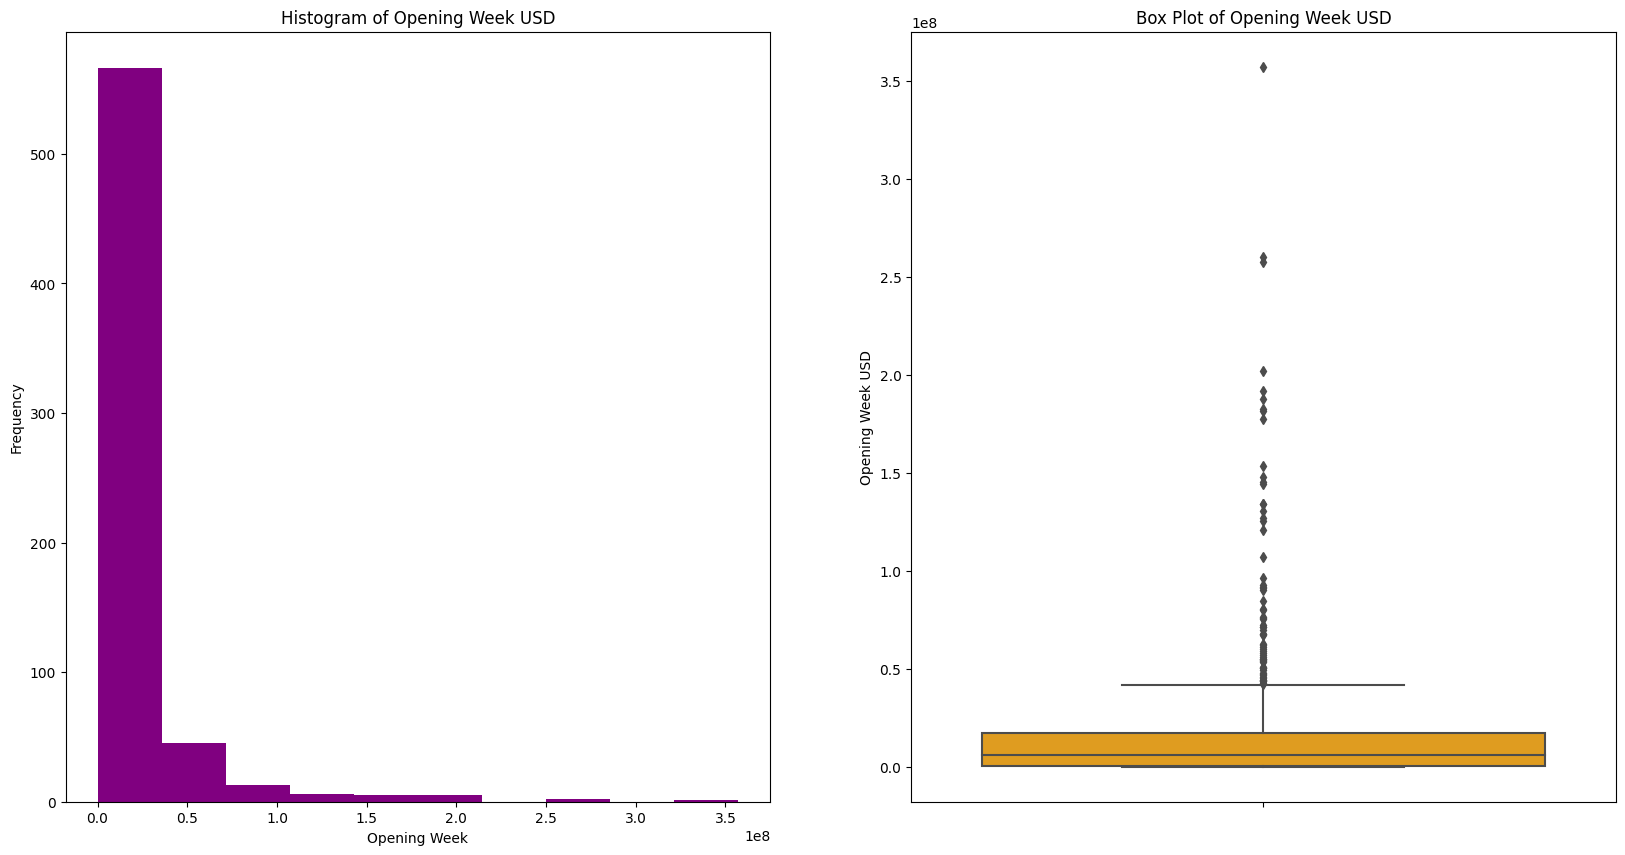

In [22]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_opening_week, bins=10, color='purple')
ax1.set_xlabel('Opening Week')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Opening Week USD')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_opening_week, color='orange', ax=ax2)
ax2.set_title('Box Plot of Opening Week USD')
ax2.set_ylabel('Opening Week USD')

# Show plot
plt.show()

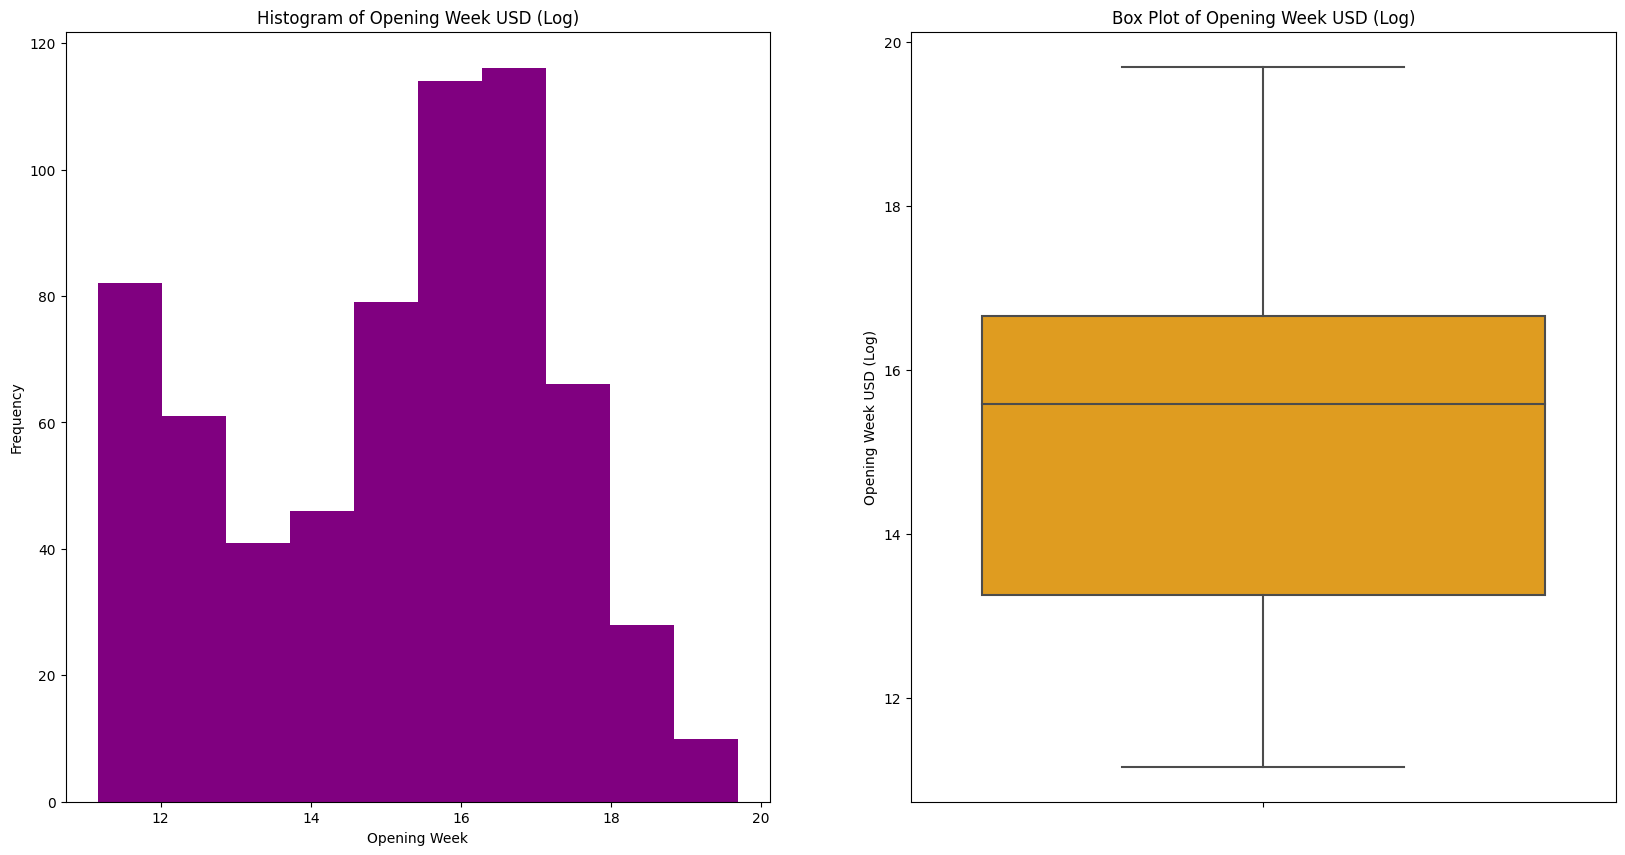

In [23]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)
# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_opening_week_log, bins=10, color='purple')
ax1.set_xlabel('Opening Week')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Opening Week USD (Log)')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_opening_week_log, color='orange', ax=ax2)
ax2.set_title('Box Plot of Opening Week USD (Log)')
ax2.set_ylabel('Opening Week USD (Log)')

# Show plot
plt.show()

### Scale Data - Opening Week

In [24]:
scalar_opening_week = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_opening_week[numerical_columns])

X_opening_week_scaled = pd.DataFrame(scalar_opening_week.transform(X_opening_week[numerical_columns]),columns=numerical_columns, index=X_opening_week.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_opening_week[binary_col]
  X_opening_week_scaled[binary_col] = bin_s

feature_names = X_opening_week_scaled.columns
X_opening_week_scaled

,budget_usd,runtime_min,title_length,movie_desc_length,cast_count_total,cast_count_director,cast_count_writer,cast_count_cast,cast_count_producer,cast_count_composer,...,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September,budget_currency_CAD,budget_currency_GBP,budget_currency_USD
movie_id,,,,,,,,,,,,,,,,,,,,,
tt1630029,5.360949,4.586336,1.469120,1.572621,2.172935,-0.288797,1.753594,-0.011573,-0.906072,-0.305169,...,0,0,0,0,0,0,0,0,0,1
tt6710474,-0.534471,1.597223,1.469120,0.525473,-0.209125,2.524783,-0.640378,-0.503710,0.254238,-0.305169,...,0,0,0,0,0,0,0,0,0,1
tt9764362,-0.170946,-0.207525,-0.416397,-0.056275,-0.430813,-0.288797,-0.640378,-0.661194,-0.648226,-0.305169,...,0,0,0,0,1,0,0,0,0,1
tt7888964,-0.504616,-1.053500,-1.044903,0.525473,-0.290266,-0.288797,-0.982375,-0.090315,-0.261456,-0.305169,...,0,0,1,0,0,0,0,0,0,1
tt10640346,0.584201,4.417140,-1.044903,0.176424,0.522590,-0.288797,-0.982375,7.508293,0.125314,-0.305169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt6512428,-0.738185,0.469255,-1.044903,1.339921,-0.758274,-0.288797,-0.298382,-0.424968,-0.519302,-0.305169,...,0,0,0,0,0,1,0,0,0,1
tt7374952,-0.645109,-0.151127,-0.416397,-0.405324,-0.690174,-0.288797,-0.298382,-0.484025,0.769931,-0.305169,...,0,0,0,1,0,0,0,0,0,1
tt6862538,-0.715158,-0.940704,-0.416397,0.990872,-0.845211,-0.288797,0.727606,-0.484025,1.027777,-0.305169,...,0,0,0,0,0,1,0,0,0,1


### Split Train-Test - Opening Week

In [25]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_opening_week_scaled, y_opening_week_log, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

Train DataSet: 514 with 93 features
Test DataSet: 129 with 93 features


In [26]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

0.5594274620769808

## Basic Models - Opening Week USD

### Basic Model - Setting (Linear and Tree)

In [27]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1],
    'n_estimators':[300]
    }

if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [28]:
models_to_use = {'LinearRegression':LinearRegression(),
                  'DecisionTreeRegressor':DecisionTreeRegressor()
                 }

In [29]:
all_model_combinations_df = get_all_model_combinations(models_to_use,parametersOfValue)
all_model_combinations_df

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 5 hyper-parameter combinations


,model_type,fit_intercept,max_depth,random_state
LinearRegression_0,LinearRegression,True,NaN,NaN
LinearRegression_1,LinearRegression,False,NaN,NaN
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,4,1
DecisionTreeRegressor_2,DecisionTreeRegressor,NaN,5,1
DecisionTreeRegressor_3,DecisionTreeRegressor,NaN,80,1
DecisionTreeRegressor_4,DecisionTreeRegressor,NaN,100,1


In [30]:
all_model_combinations_df, dict_of_fitted_models = run_various_models_return_results(all_model_combinations_df, all_model_types, use_cross_validate=False)

Model #1 of 7
Model Name: LinearRegression_0
Model Props: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Train_score: 0.729 / Test_score: 0.559.

Model #2 of 7
Model Name: LinearRegression_1
Model Props: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
Train_score: 0.749 / Test_score: 0.609.

Model #3 of 7
Model Name: DecisionTreeRegressor_0
Model Props: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
Train_score: 0.61 / Test_score: 0.55.

Model #4 of 7
Model Name: DecisionTreeRegressor_1
Model Props: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'rand

In [31]:
all_model_combinations_df.sort_values(by='test_score_r2', ascending=False).head(10)

,model_type,fit_intercept,max_depth,random_state,train_score,val_score,test_score_r2,test_score_mse,test_score_rmse,train_size,test_size,feature_n,run_time
LinearRegression_1,LinearRegression,False,NaN,NaN,0.749098,NaN,0.608550,1.697231,1.302778,514.0,129.0,93.0,0.1098
LinearRegression_0,LinearRegression,True,NaN,NaN,0.728699,NaN,0.559427,1.910217,1.382106,514.0,129.0,93.0,0.0747
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1,0.610182,NaN,0.549811,1.951912,1.397109,514.0,129.0,93.0,0.0692
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,4,1,0.676989,NaN,0.481087,2.249883,1.499961,514.0,129.0,93.0,0.0516
DecisionTreeRegressor_2,DecisionTreeRegressor,NaN,5,1,0.744847,NaN,0.449827,2.385418,1.544480,514.0,129.0,93.0,0.0572
DecisionTreeRegressor_3,DecisionTreeRegressor,NaN,80,1,1.000000,NaN,0.253577,3.236311,1.798975,514.0,129.0,93.0,0.0606
DecisionTreeRegressor_4,DecisionTreeRegressor,NaN,100,1,1.000000,NaN,0.253577,3.236311,1.798975,514.0,129.0,93.0,0.0989


Finally, we will have a data frame containning our models, their instructions, and their resaults:

### Basic Models - Best Performing

<br><b>Best Performing model:</b><br>
Since we collected all sort of output scores from our model, we can check and see which model performed best for each category:

In [32]:
cols_to_show = ['model_type','fit_intercept','max_depth','train_score','val_score','test_score_r2','test_score_mse','run_time']
print(f"Top 3 performing models based on test_score Score")
all_model_combinations_df[cols_to_show].sort_values(by='test_score_r2', ascending=False).head(10)

Top 3 performing models based on test_score Score


,model_type,fit_intercept,max_depth,train_score,val_score,test_score_r2,test_score_mse,run_time
LinearRegression_1,LinearRegression,False,NaN,0.749098,NaN,0.608550,1.697231,0.1098
LinearRegression_0,LinearRegression,True,NaN,0.728699,NaN,0.559427,1.910217,0.0747
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,0.610182,NaN,0.549811,1.951912,0.0692
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,4,0.676989,NaN,0.481087,2.249883,0.0516
DecisionTreeRegressor_2,DecisionTreeRegressor,NaN,5,0.744847,NaN,0.449827,2.385418,0.0572
DecisionTreeRegressor_3,DecisionTreeRegressor,NaN,80,1.000000,NaN,0.253577,3.236311,0.0606
DecisionTreeRegressor_4,DecisionTreeRegressor,NaN,100,1.000000,NaN,0.253577,3.236311,0.0989


### Basic Models - Plot results

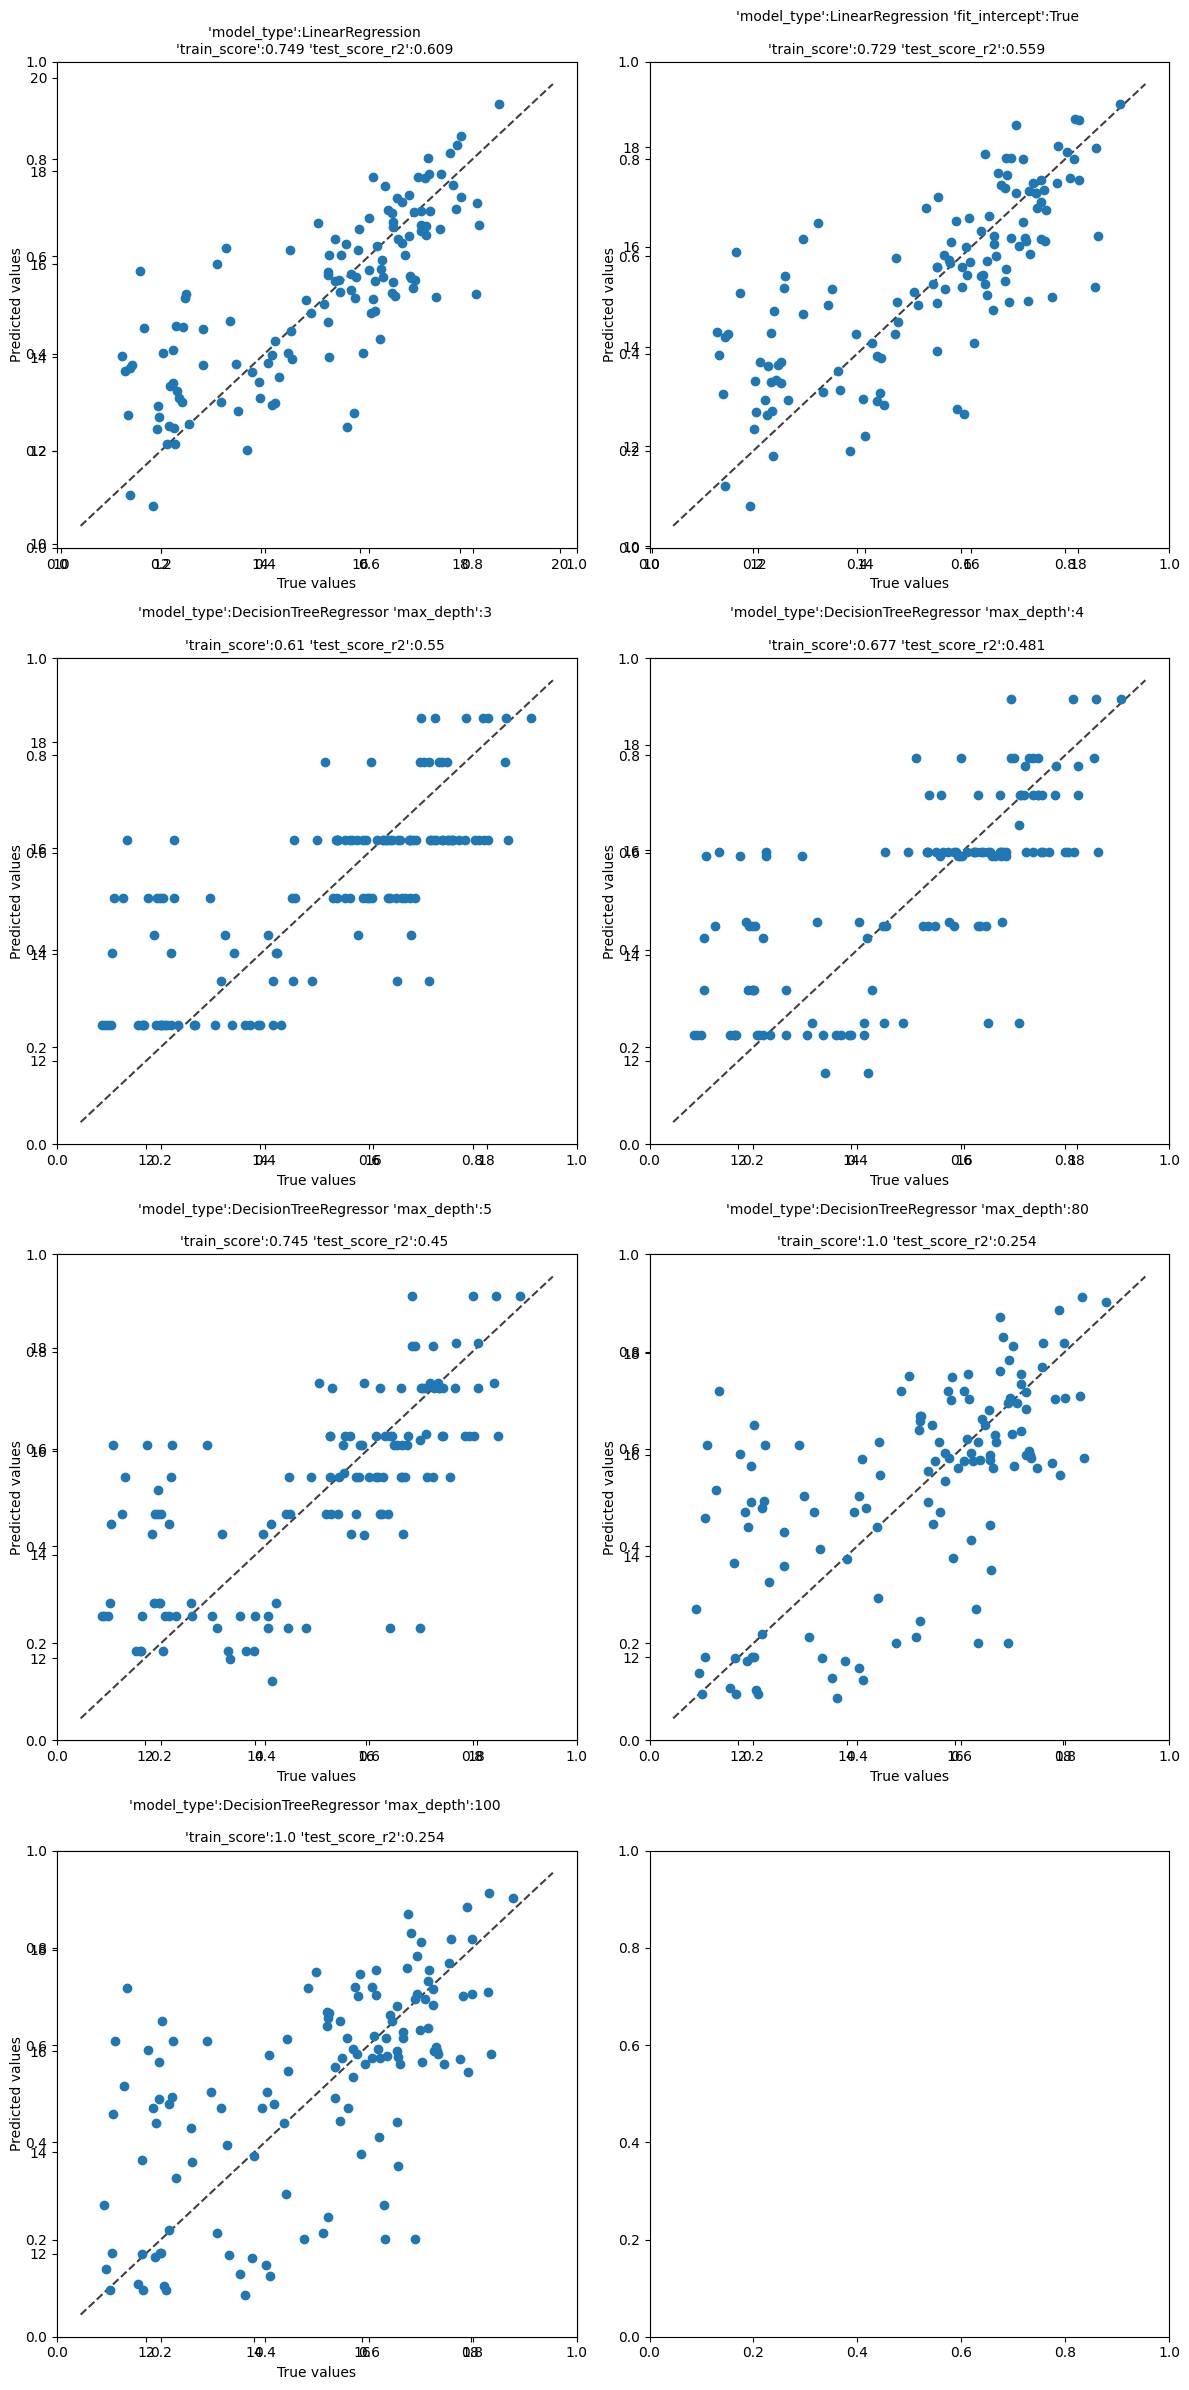

In [33]:
scatterplot_model_preformence(all_model_combinations_df,dict_of_fitted_models)

In [34]:
best_performing_model = all_model_combinations_df[all_model_combinations_df['model_type']=='LinearRegression'].sort_values(by='test_score_r2', ascending=False).head(1)
best_model = dict_of_fitted_models[best_performing_model.index[0]]
print(f"Our best performing model so far is {best_model} --> {round(best_performing_model['test_score_r2'][0],3)} test_score score")

Our best performing model so far is LinearRegression(fit_intercept=False) --> 0.609 test_score score


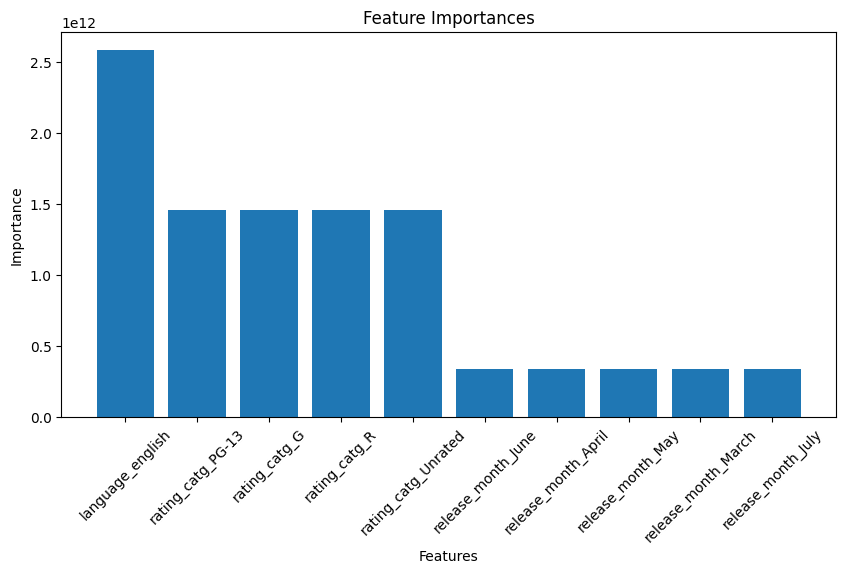

In [35]:
coefficients = best_model.coef_

# Display feature importances
feature_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": np.abs(coefficients)}
)
feature_importances = feature_importances.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(range(10), feature_importances['Feature'].head(10), rotation=45)
plt.show()

## Boosting Models - Opening Week

<br><b>Ensemble Models:</b><br>
Ensemble models are machine learning algorithms that combine the predictions of multiple base models to make more accurate predictions.

Unlike Single Classification models where we used cross-val on our training set, for Bootstrapping methods we will need to create a separate validation data-set

In [36]:
models_to_use = {'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [37]:
parametersOfValue = {
    'estimator':[None],
    'n_estimators':[300],
    'max_depth':[3,4],
    'learning_rate':[0.01,0.1],
    'random_state':[1]
    }

if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [1500]
  parametersOfValue['max_depth'] = [3,4,5]

In [38]:
boosting_model_combinations_df = get_all_model_combinations(models_to_use,parametersOfValue)
boosting_model_combinations_df.head(15)

Model Type: AdaBoostRegressor - 4 hyper-parameter combinations
Model Type: XGBRegressor  - 6 hyper-parameter combinations


,model_type,estimator,learning_rate,n_estimators,random_state,max_depth
AdaBoostRegressor_0,AdaBoostRegressor,None,0.01,1500,1,NaN
AdaBoostRegressor_1,AdaBoostRegressor,None,0.1,1500,1,NaN
AdaBoostRegressor_2,AdaBoostRegressor,LinearRegression(fit_intercept=False),0.01,1500,1,NaN
AdaBoostRegressor_3,AdaBoostRegressor,LinearRegression(fit_intercept=False),0.1,1500,1,NaN
XGBRegressor _0,XGBRegressor,NaN,0.01,1500,1,3
XGBRegressor _1,XGBRegressor,NaN,0.01,1500,1,4
XGBRegressor _2,XGBRegressor,NaN,0.01,1500,1,5
XGBRegressor _3,XGBRegressor,NaN,0.1,1500,1,3
XGBRegressor _4,XGBRegressor,NaN,0.1,1500,1,4
XGBRegressor _5,XGBRegressor,NaN,0.1,1500,1,5


In [39]:
boosting_model_combinations_df, dict_boosting_models = run_various_models_return_results(boosting_model_combinations_df, all_model_types, use_cross_validate=False)

Model #1 of 10
Model Name: AdaBoostRegressor_0
Model Props: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 1500, 'random_state': 1}
Train_score: 0.715 / Test_score: 0.637.

Model #2 of 10
Model Name: AdaBoostRegressor_1
Model Props: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 1500, 'random_state': 1}
Train_score: 0.728 / Test_score: 0.644.

Model #3 of 10
Model Name: AdaBoostRegressor_2
Model Props: {'base_estimator': 'deprecated', 'estimator': LinearRegression(fit_intercept=False), 'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 1500, 'random_state': 1}
Train_score: 0.753 / Test_score: 0.618.

Model #4 of 10
Model Name: AdaBoostRegressor_3
Model Props: {'base_estimator': 'deprecated', 'estimator': LinearRegression(fit_intercept=False), 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 1500, 'random_state': 1}
Train_score: 0.734 / Test_score: 0.60

In [40]:
boosting_model_combinations_df.head(15)

,model_type,estimator,learning_rate,n_estimators,random_state,max_depth,train_score,val_score,test_score_r2,test_score_mse,test_score_rmse,train_size,test_size,feature_n,run_time
XGBRegressor _2,XGBRegressor,NaN,0.01,1500,1,5,0.992513,NaN,0.663110,1.460675,1.208584,514.0,129.0,93.0,4.3427
XGBRegressor _1,XGBRegressor,NaN,0.01,1500,1,4,0.974958,NaN,0.656052,1.491278,1.221179,514.0,129.0,93.0,5.2576
XGBRegressor _0,XGBRegressor,NaN,0.01,1500,1,3,0.924662,NaN,0.654608,1.497538,1.223739,514.0,129.0,93.0,4.2122
XGBRegressor _5,XGBRegressor,NaN,0.1,1500,1,5,1.000000,NaN,0.653552,1.502117,1.225609,514.0,129.0,93.0,2.7691
AdaBoostRegressor_1,AdaBoostRegressor,None,0.1,1500,1,NaN,0.727796,NaN,0.644006,1.543505,1.242379,514.0,129.0,93.0,4.8930
XGBRegressor _4,XGBRegressor,NaN,0.1,1500,1,4,1.000000,NaN,0.641253,1.555439,1.247173,514.0,129.0,93.0,5.3432
AdaBoostRegressor_0,AdaBoostRegressor,None,0.01,1500,1,NaN,0.715133,NaN,0.637329,1.572453,1.253975,514.0,129.0,93.0,17.5280
XGBRegressor _3,XGBRegressor,NaN,0.1,1500,1,3,0.999982,NaN,0.622582,1.636396,1.279217,514.0,129.0,93.0,3.5265
AdaBoostRegressor_2,AdaBoostRegressor,LinearRegression(fit_intercept=False),0.01,1500,1,NaN,0.753432,NaN,0.617555,1.658188,1.287707,514.0,129.0,93.0,28.4014
AdaBoostRegressor_3,AdaBoostRegressor,LinearRegression(fit_intercept=False),0.1,1500,1,NaN,0.734266,NaN,0.604746,1.713725,1.309093,514.0,129.0,93.0,28.4768


### Boosting - Plot Results

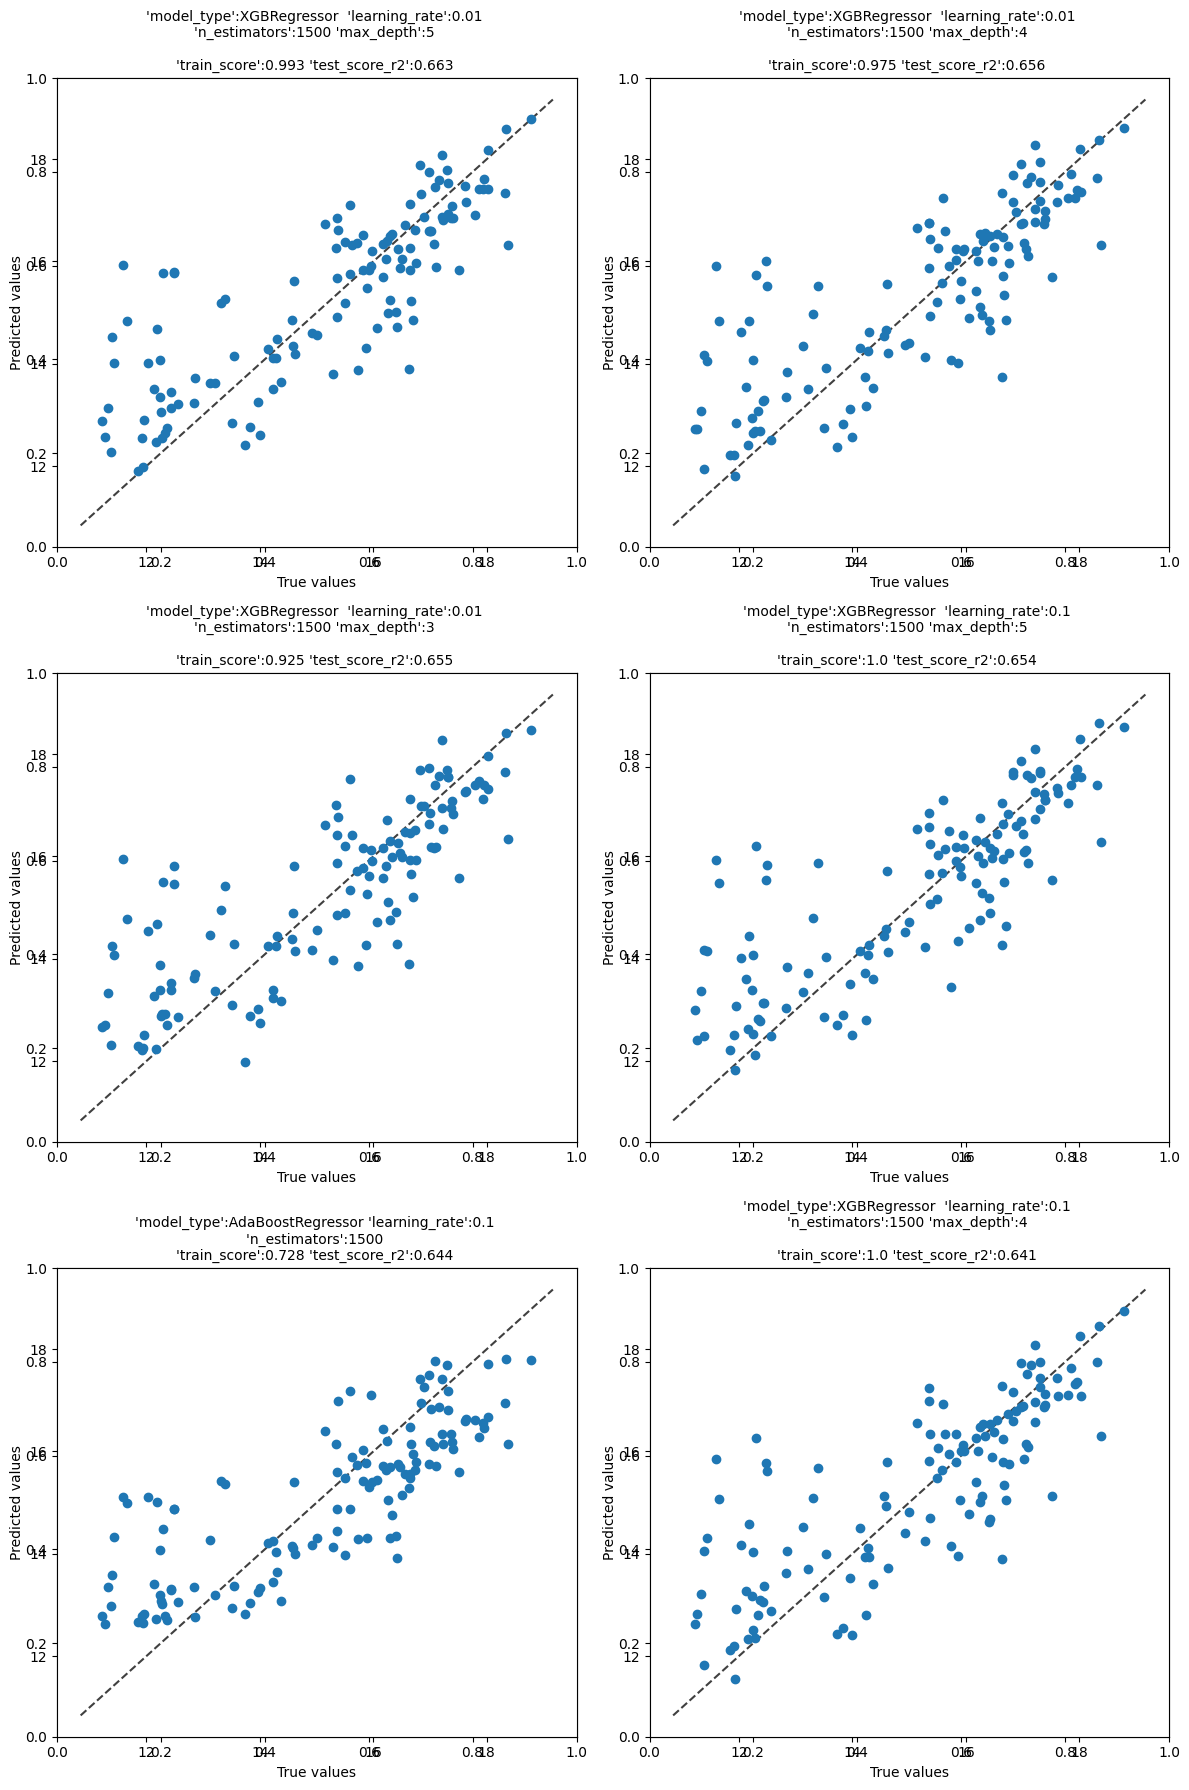

In [41]:
scatterplot_model_preformence(boosting_model_combinations_df.head(6),dict_boosting_models)

For Boosting model we would prefer to keep our trees shallow and non-complex, since they are built sequntially and we do not want to risk ovefitting.<br>
Next, we would like to explor some highly deel trees:

## Bagging Models - Opening Week

In BaggingClassifier, the subsets of the training data are generated using bootstrap sampling, which means that each subset is a random sample of the training data with replacement.<br>
It involves training multiple base models independently on different subsets of the training data, and then combining the predictions of the individual base models to make a final prediction.

In [42]:
dict_of_models = {'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                 }

In [43]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[300],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1]
    }

if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [500,1000, 2000]
  parametersOfValue['max_depth'] = [3,4,50,80,100]

In [44]:
bagging_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
bagging_model_combinations_df

Model Type: BaggingRegressor  - 6 hyper-parameter combinations
Model Type: RandomForestRegressor - 30 hyper-parameter combinations


,model_type,estimator,max_features,n_estimators,random_state,max_depth
BaggingRegressor _0,BaggingRegressor,None,9,500,1,NaN
BaggingRegressor _1,BaggingRegressor,None,9,1000,1,NaN
BaggingRegressor _2,BaggingRegressor,None,9,2000,1,NaN
BaggingRegressor _3,BaggingRegressor,None,31,500,1,NaN
BaggingRegressor _4,BaggingRegressor,None,31,1000,1,NaN
BaggingRegressor _5,BaggingRegressor,None,31,2000,1,NaN
RandomForestRegressor_0,RandomForestRegressor,NaN,9,500,1,3
RandomForestRegressor_1,RandomForestRegressor,NaN,9,1000,1,3
RandomForestRegressor_2,RandomForestRegressor,NaN,9,2000,1,3
RandomForestRegressor_3,RandomForestRegressor,NaN,31,500,1,3


In [45]:
bagging_model_combinations_df, dict_bagging_models = run_various_models_return_results(bagging_model_combinations_df, all_model_types, use_cross_validate=False)

Model #1 of 36
Model Name: BaggingRegressor _0
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 9, 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Train_score: 0.889 / Test_score: 0.535.

Model #2 of 36
Model Name: BaggingRegressor _1
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 9, 'max_samples': 1.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Train_score: 0.887 / Test_score: 0.535.

Model #3 of 36
Model Name: BaggingRegressor _2
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 9, 'max_samples': 1.0, 'n_estimators': 2000, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_s

In [46]:
bagging_model_combinations_df.head(15)

,model_type,estimator,max_features,n_estimators,random_state,max_depth,train_score,val_score,test_score_r2,test_score_mse,test_score_rmse,train_size,test_size,feature_n,run_time
RandomForestRegressor_29,RandomForestRegressor,NaN,31,2000,1,100,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.3226
RandomForestRegressor_23,RandomForestRegressor,NaN,31,2000,1,80,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.4109
RandomForestRegressor_17,RandomForestRegressor,NaN,31,2000,1,50,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.1970
RandomForestRegressor_16,RandomForestRegressor,NaN,31,1000,1,50,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.8131
RandomForestRegressor_22,RandomForestRegressor,NaN,31,1000,1,80,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.9996
RandomForestRegressor_28,RandomForestRegressor,NaN,31,1000,1,100,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.8763
RandomForestRegressor_21,RandomForestRegressor,NaN,31,500,1,80,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,2.5530
RandomForestRegressor_27,RandomForestRegressor,NaN,31,500,1,100,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,2.4487
RandomForestRegressor_15,RandomForestRegressor,NaN,31,500,1,50,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,3.2456
RandomForestRegressor_25,RandomForestRegressor,NaN,9,1000,1,100,0.949589,NaN,0.658067,1.482537,1.217595,514.0,129.0,93.0,2.8931


### Bagging - Plot results

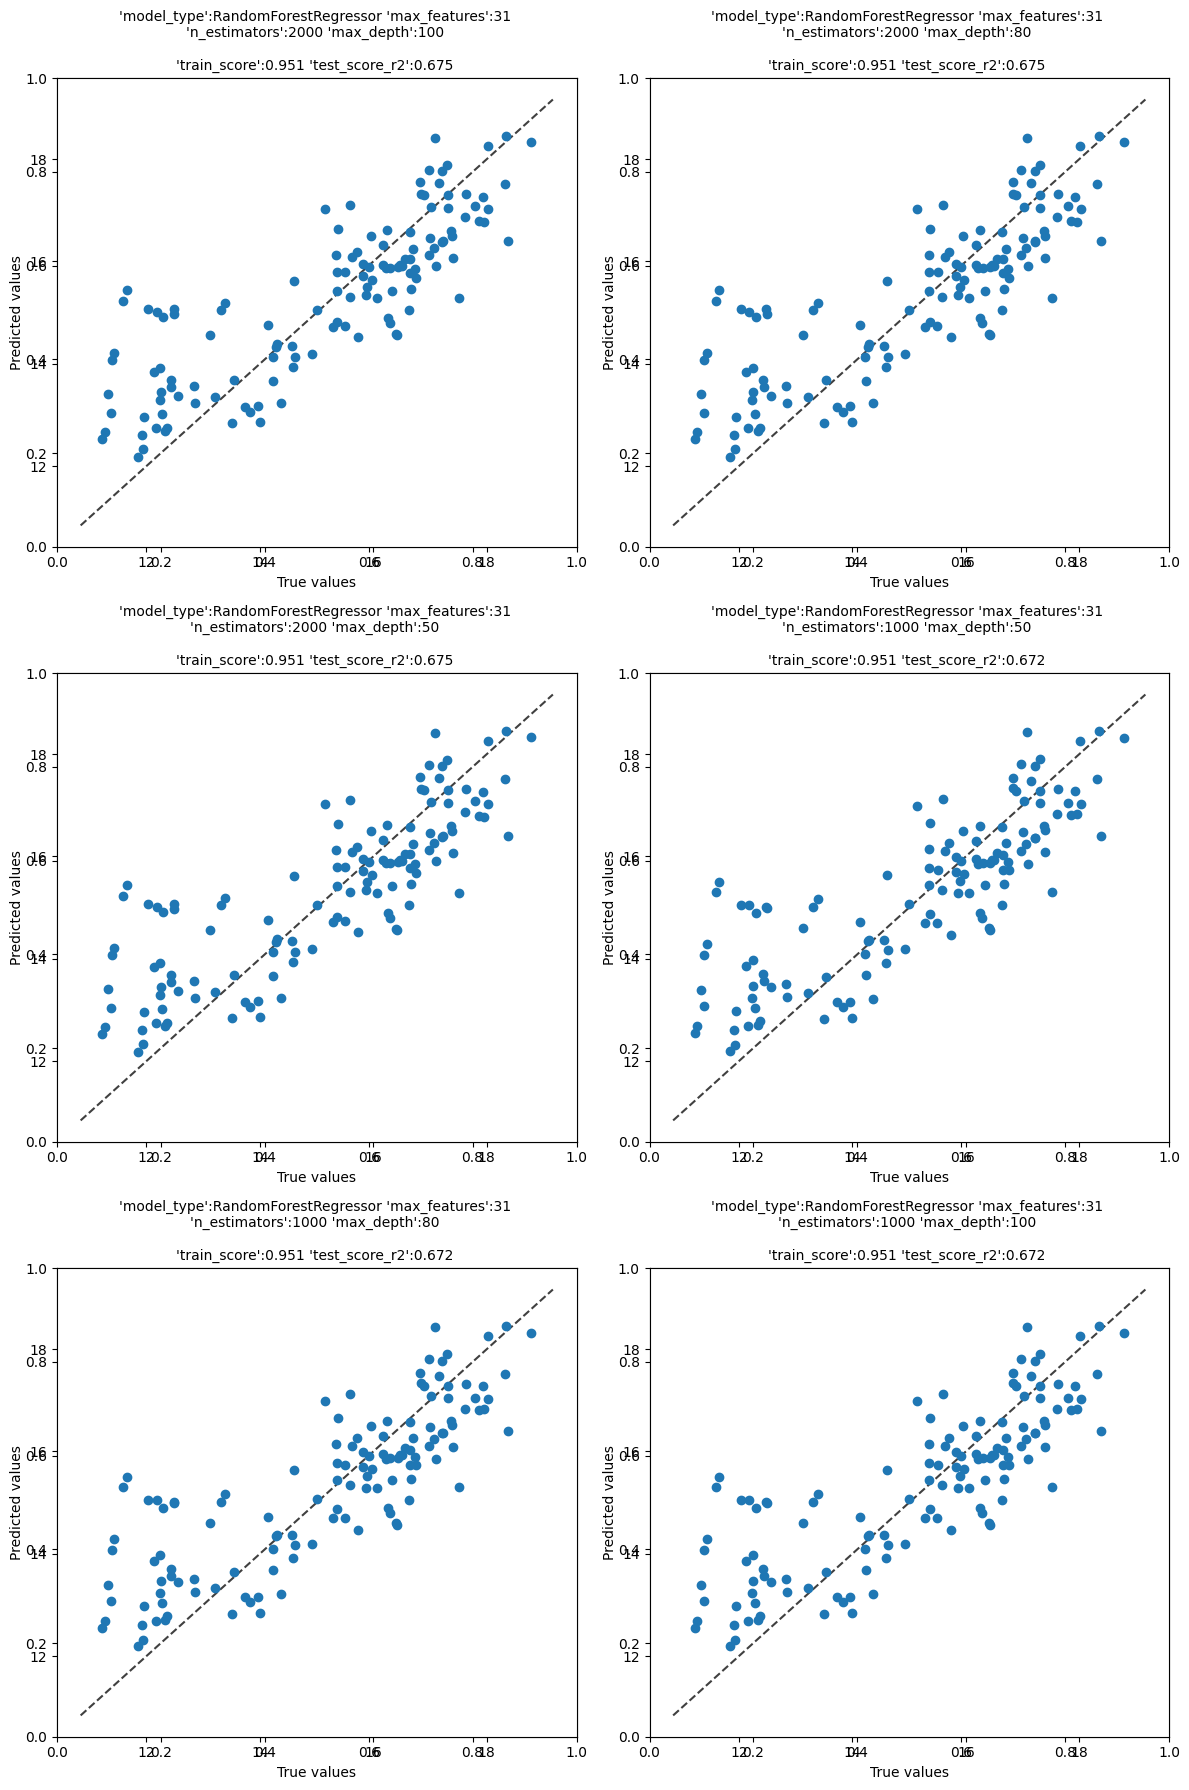

In [47]:
scatterplot_model_preformence(bagging_model_combinations_df.head(6),dict_bagging_models)

<br><b>Random Forest feature selection:</b><br>
Same as bagging, only with random feature selection

In [ ]:
best_rf_result = bagging_model_combinations_df[bagging_model_combinations_df['model_type']=='RandomForestRegressor'].sort_values(by="test_score_r2",ascending=False).head(1).index[0]
best_rf_model = dict_bagging_models[best_rf_result]
best_rf_model

In [ ]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_opening_week, bins=10, color='purple')
ax1.set_xlabel('Opening Week')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Opening Week USD')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_opening_week, color='orange', ax=ax2)
ax2.set_title('Box Plot of Opening Week USD')
ax2.set_ylabel('Opening Week USD')

# Show plot
plt.show()

In [50]:
def plot_feature_importance(rf_model, threshold):
    # Get feature importance
    importances = rf_model.feature_importances_
    features = rf_model.feature_names_in_

    importance_dict = dict(zip(features, importances))
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

    features = [x[0] for x in sorted_importance if x[1] >= threshold]
    importances = [x[1] for x in sorted_importance if x[1] >= threshold]
    
    # Create a bar plot of the feature importance
    fig = plt.gcf()
    fig.set_size_inches(8,8)

    ax1 = fig.add_subplot(1,1,1)
    ax1.barh(features, importances, color='orange')
    ax1.set_xlabel('Importance Score')
    ax1.set_ylabel('Feature Name')
    model_title = get_model_desc_single_model(rf_model)
    ax1.set_title(f'Feature Importance\n{model_title}', fontsize=10)
    # Create a list of features with importance score above threshold
    important_features = [feature for feature, importance in importance_dict.items() if importance >= threshold]
    # Return the list of important features

    fig.show()


    return important_features

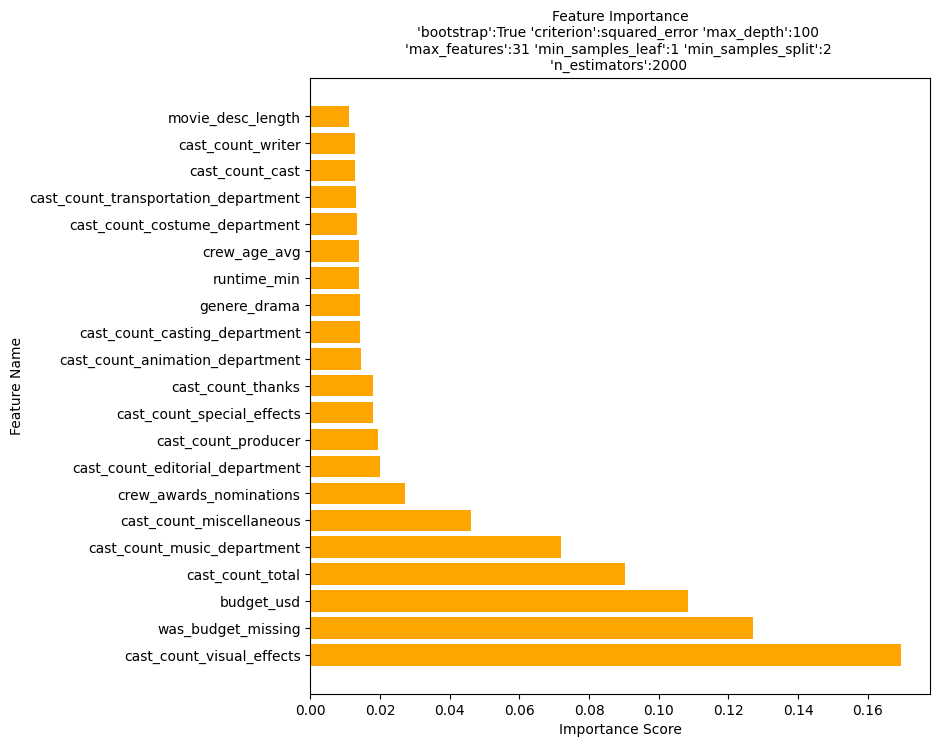

In [51]:
columns_to_run = plot_feature_importance(best_rf_model, threshold=0.01)

## SHAP Plot - Opening Week

In [52]:
def plot_shape(rf_model, feature_name ,max_display=25):
    
    explainer = shap.TreeExplainer(rf_model)
    sample = x_train_scaled[:50]
    shap_values = explainer.shap_values(sample)
    shap.summary_plot(shap_values, sample, title="Shap Plot",plot_size=(18,12), max_display=max_display, show=False)

    plt.title(f"SHAP Plot - {feature_name}\n", fontsize=16)
    plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


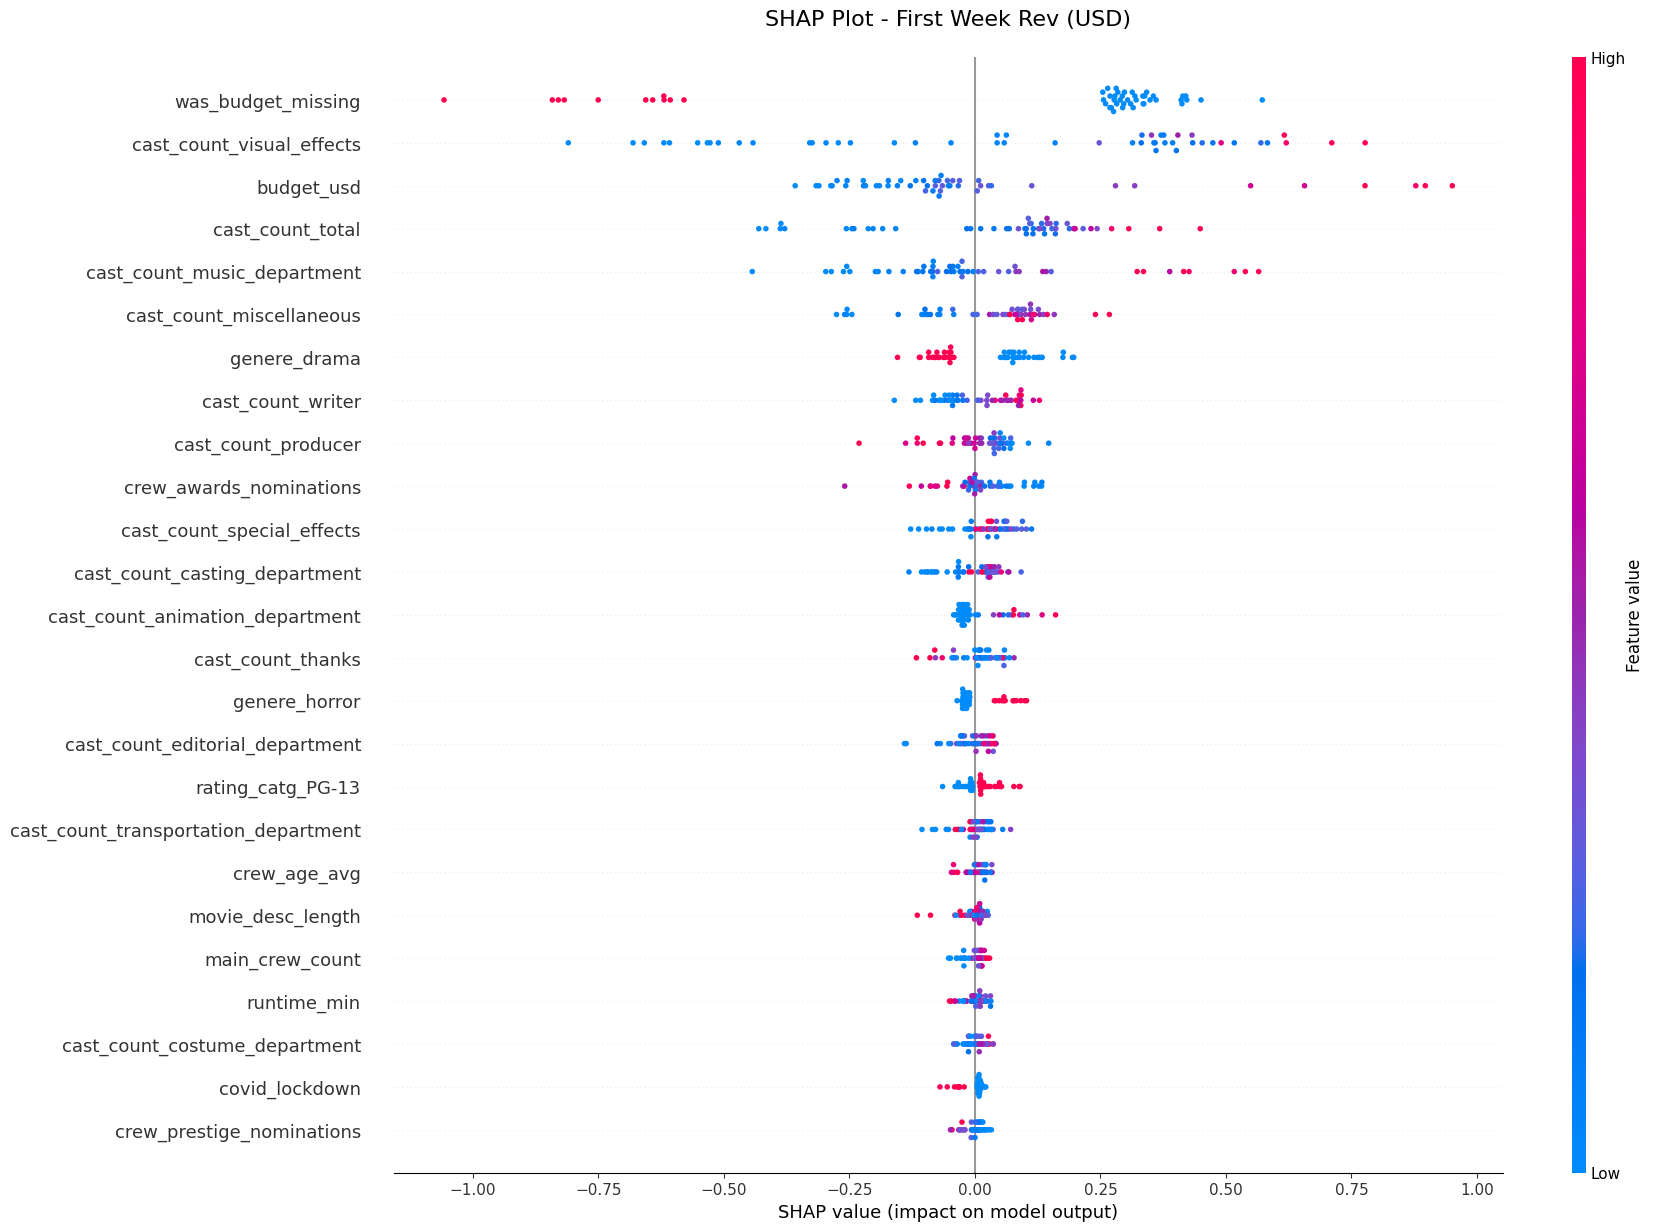

In [53]:
plot_shape(best_rf_model, feature_name= "First Week Rev (USD)")

## Feature Reduction - Opening Week

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(columns_to_run))), int(len(columns_to_run)/3)],
    'n_estimators':[300],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1]
        }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [1000]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
dict_of_models = {'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                 }

In [ ]:
rf_model_thin_df = get_all_model_combinations(dict_of_models,parametersOfValue)
rf_model_thin_df

### Run thin models

In [ ]:
rf_model_thin_df, dict_rf_model_thin = run_various_models_return_results(rf_model_thin_df, all_model_types, use_cross_validate=False, limit_features_list=columns_to_run)

In [ ]:
rf_model_thin_df.index = 'Thin_' + rf_model_thin_df.index.astype(str)
rf_model_thin_df.head(10)

## Comapring all models - Opening Week

In [59]:
all_models_output = boosting_model_combinations_df.append(bagging_model_combinations_df).append(rf_model_thin_df).append(all_model_combinations_df)
all_models_output.sort_values(by="test_score_r2", ascending=False).head(10)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,model_type,estimator,learning_rate,n_estimators,random_state,max_depth,train_score,val_score,test_score_r2,test_score_mse,test_score_rmse,train_size,test_size,feature_n,run_time,max_features,fit_intercept
RandomForestRegressor_29,RandomForestRegressor,NaN,NaN,2000,1,100,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.3226,31,NaN
RandomForestRegressor_23,RandomForestRegressor,NaN,NaN,2000,1,80,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.4109,31,NaN
RandomForestRegressor_17,RandomForestRegressor,NaN,NaN,2000,1,50,0.951421,NaN,0.674509,1.411249,1.187960,514.0,129.0,93.0,11.1970,31,NaN
RandomForestRegressor_28,RandomForestRegressor,NaN,NaN,1000,1,100,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.8763,31,NaN
RandomForestRegressor_22,RandomForestRegressor,NaN,NaN,1000,1,80,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.9996,31,NaN
RandomForestRegressor_16,RandomForestRegressor,NaN,NaN,1000,1,50,0.951434,NaN,0.671601,1.423859,1.193256,514.0,129.0,93.0,4.8131,31,NaN
RandomForestRegressor_15,RandomForestRegressor,NaN,NaN,500,1,50,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,3.2456,31,NaN
RandomForestRegressor_27,RandomForestRegressor,NaN,NaN,500,1,100,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,2.4487,31,NaN
RandomForestRegressor_21,RandomForestRegressor,NaN,NaN,500,1,80,0.951907,NaN,0.670211,1.429888,1.195779,514.0,129.0,93.0,2.5530,31,NaN
Thin_RandomForestRegressor_7,RandomForestRegressor,NaN,NaN,1000,1,80,0.950042,NaN,0.663501,1.458979,1.207882,514.0,129.0,21.0,3.3187,7,NaN


## Best Model - First Week USD

In [ ]:
best_output_first_week = all_models_output[all_models_output['model_type']!='LinearRegression'].sort_values(by="test_score_r2", ascending=False).head(1)
best_model_first_week = output_to_fitted_model(best_output_first_week,columns_to_run=None)
best_model_first_week

# Gross Revenue USD

## Data Preparing

### Filter Missing Ys - Gross Revenue

In [ ]:
minimum_threshold_to_filter_out = 100000
gross_rev_na_mask = np.logical_or(y_gross_us_canada_raw.isna(), y_gross_us_canada_raw < minimum_threshold_to_filter_out)
y_gross_rev = y_gross_us_canada_raw[~gross_rev_na_mask].copy()
y_gross_rev_log = np.log(y_gross_rev)
X_gross_rev = X_ohe_reduced[~gross_rev_na_mask].copy()
#X_gross_rev.shape,y_gross_rev.shape
print(f"Only {len(y_gross_rev)} out of {len(gross_rev_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_gross_rev, bins=10, color='purple')
ax1.set_xlabel('User rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Gross Revenue USD')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_gross_rev, color='orange', ax=ax2)
ax2.set_title('Box Plot of Gross Revenue USD')
ax2.set_ylabel('Gross Revenue USD')

# Show plot
plt.show()

In [ ]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_gross_rev_log, bins=10, color='purple')
ax1.set_xlabel('User rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Gross Revenue USD (Log)')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_gross_rev_log, color='orange', ax=ax2)
ax2.set_title('Box Plot of Gross Revenue USD (Log)')
ax2.set_ylabel('Gross Revenue USD (Log)')

# Show plot
plt.show()

### Scale Data - Gross Revenue

In [ ]:
scalar_gross_rev = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_gross_rev[numerical_columns])

X_gross_rev_scaled = pd.DataFrame(scalar_gross_rev.transform(X_gross_rev[numerical_columns]),columns=numerical_columns, index=X_gross_rev.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_gross_rev[binary_col]
  X_gross_rev_scaled[binary_col] = bin_s

feature_names = X_gross_rev_scaled.columns
X_gross_rev_scaled

### Split Train-Test - Gross Revenue

In [65]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_gross_rev_scaled, y_gross_rev_log, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

Train DataSet: 593 with 93 features
Test DataSet: 149 with 93 features


## Exploring all models - Gross Revenue

In [66]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[300],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1500]
  parametersOfValue['max_depth'] = [3,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01]

In [67]:
models_to_use = {#'LinearRegression':LinearRegression()
                  #,'DecisionTreeRegressor':DecisionTreeRegressor()
                  'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [68]:
all_model_combinations_gross_rev = get_all_model_combinations(models_to_use,parametersOfValue)
all_model_combinations_gross_rev.head(15)

Model Type: BaggingRegressor  - 8 hyper-parameter combinations
Model Type: RandomForestRegressor - 16 hyper-parameter combinations
Model Type: AdaBoostRegressor - 8 hyper-parameter combinations
Model Type: XGBRegressor  - 16 hyper-parameter combinations


,model_type,estimator,max_features,n_estimators,random_state,max_depth,learning_rate
BaggingRegressor _0,BaggingRegressor,None,9,500,1,NaN,NaN
BaggingRegressor _1,BaggingRegressor,None,9,1500,1,NaN,NaN
BaggingRegressor _2,BaggingRegressor,None,31,500,1,NaN,NaN
BaggingRegressor _3,BaggingRegressor,None,31,1500,1,NaN,NaN
BaggingRegressor _4,BaggingRegressor,LinearRegression(fit_intercept=False),9,500,1,NaN,NaN
BaggingRegressor _5,BaggingRegressor,LinearRegression(fit_intercept=False),9,1500,1,NaN,NaN
BaggingRegressor _6,BaggingRegressor,LinearRegression(fit_intercept=False),31,500,1,NaN,NaN
BaggingRegressor _7,BaggingRegressor,LinearRegression(fit_intercept=False),31,1500,1,NaN,NaN
RandomForestRegressor_0,RandomForestRegressor,NaN,9,500,1,3,NaN
RandomForestRegressor_1,RandomForestRegressor,NaN,9,1500,1,3,NaN


Run the top 10 performing models using the narrowed dataset in hope to reduce 

In [69]:
all_model_combinations_gross_rev, dict_of_fitted_models_gross_rev = run_various_models_return_results(all_model_combinations_gross_rev, all_model_types, use_cross_validate=False)

Model #1 of 48
Model Name: BaggingRegressor _0
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 9, 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Train_score: 0.902 / Test_score: 0.584.

Model #2 of 48
Model Name: BaggingRegressor _1
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 9, 'max_samples': 1.0, 'n_estimators': 1500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Train_score: 0.902 / Test_score: 0.586.

Model #3 of 48
Model Name: BaggingRegressor _2
Model Props: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 31, 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_s

In [ ]:
all_model_combinations_gross_rev.sort_values(by="test_score_r2", ascending=False).head(15)

## Model Performence - Gross Rev

In [ ]:
scatterplot_model_preformence(all_model_combinations_gross_rev.head(8),dict_of_fitted_models_gross_rev)

In [ ]:
best_output_gross_rev = all_model_combinations_gross_rev.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_gross_rev = output_to_fitted_model(best_output_gross_rev,columns_to_run=None)
best_model_gross_rev

## Feature Importance - Gross Rev

In [ ]:
columns_to_run = plot_feature_importance(best_model_gross_rev, threshold=0.009)

In [ ]:
best_rf_output = all_model_combinations_gross_rev[all_model_combinations_gross_rev['model_type']=='RandomForestRegressor'].sort_values(by="test_score_r2", ascending=False).head(1)
best_rf_model_gross_rev = output_to_fitted_model(best_rf_output,columns_to_run=None)
best_rf_model_gross_rev

## SHAP Plot - Gross Rev.

In [ ]:
plot_shape(best_rf_model_gross_rev, feature_name= "Gross Revenue (USD)")

# Meta Score

## Data Preparing

### Filter Missing Ys - Metascore

In [ ]:
minimum_threshold_to_filter_out = 0
metascore_na_mask = np.logical_or(y_metascore_raw.isna(), y_metascore_raw < minimum_threshold_to_filter_out)
metascore_na_mask = metascore_na_mask #| gross_rev_na_mask # Try using gross_rev_na_mask as an additional mask for metascore
y_metascore = y_metascore_raw[~metascore_na_mask].copy()
X_metascore = X_ohe_reduced[~metascore_na_mask].copy()
#X_metascore.shape,y_metascore.shape
print(f"Only {len(y_metascore)} out of {len(metascore_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_metascore, bins=10, color='purple')
ax1.set_xlabel('User rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of User Metascore')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_metascore, color='orange', ax=ax2)
ax2.set_title('Box Plot of Metascore')
ax2.set_ylabel('Metascore')

# Show plot
plt.show()

### Scale Data - Metascore

In [ ]:
scalar_metascore = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_metascore[numerical_columns])

X_metascore_scaled = pd.DataFrame(scalar_metascore.transform(X_metascore[numerical_columns]),columns=numerical_columns, index=X_metascore.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_metascore[binary_col]
  X_metascore_scaled[binary_col] = bin_s

feature_names = X_metascore_scaled.columns
X_metascore_scaled

### Split Train-Test - Metascore

In [ ]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_metascore_scaled, y_metascore, train_size = 0.8, random_state=1)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

## Exploring all models - Metascore

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[300],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [500, 1500]
  parametersOfValue['max_depth'] = [3,5,80,100, 200]
  parametersOfValue['learning_rate'] = [0.1,0.01, 0.001]

In [ ]:
models_to_use = {'LinearRegression':LinearRegression()
                  #,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [82]:
all_model_combinations_metascore = get_all_model_combinations(models_to_use,parametersOfValue)
all_model_combinations_metascore

Model Type: LinearRegression - 1 hyper-parameter combinations
Model Type: BaggingRegressor  - 4 hyper-parameter combinations
Model Type: RandomForestRegressor - 20 hyper-parameter combinations
Model Type: AdaBoostRegressor - 6 hyper-parameter combinations
Model Type: XGBRegressor  - 30 hyper-parameter combinations


,model_type,estimator,max_features,n_estimators,random_state,max_depth,learning_rate
LinearRegression_0,LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN
BaggingRegressor _0,BaggingRegressor,None,9,500,1,NaN,NaN
BaggingRegressor _1,BaggingRegressor,None,9,1500,1,NaN,NaN
BaggingRegressor _2,BaggingRegressor,None,31,500,1,NaN,NaN
BaggingRegressor _3,BaggingRegressor,None,31,1500,1,NaN,NaN
...,...,...,...,...,...,...,...
XGBRegressor _25,XGBRegressor,NaN,NaN,1500,1,80,0.001
XGBRegressor _26,XGBRegressor,NaN,NaN,500,1,100,0.001
XGBRegressor _27,XGBRegressor,NaN,NaN,1500,1,100,0.001
XGBRegressor _28,XGBRegressor,NaN,NaN,500,1,200,0.001


In [ ]:
all_model_combinations_metascore, dict_of_fitted_models_metascore = run_various_models_return_results(all_model_combinations_metascore, all_model_types, use_cross_validate=False)

In [ ]:
all_model_combinations_metascore.sort_values(by="test_score_r2", ascending=False)

In [ ]:
scatterplot_model_preformence(all_model_combinations_metascore.head(8),dict_of_fitted_models_metascore)

In [86]:
best_output_metascore = all_model_combinations_metascore.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_metascore = output_to_fitted_model(best_output_metascore,columns_to_run=None)
best_model_metascore

Model #1 of 1
Model Name: XGBRegressor _13
Model Props: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 1500, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Train_score: 0.873 / Test_score: 0.256.


Finished Run

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

## Feature Importance - Metascore

In [ ]:
columns_to_run_metascore = plot_feature_importance(best_model_metascore, threshold=0.01)

In [ ]:
best_rf_output = all_model_combinations_metascore[all_model_combinations_metascore['model_type']=='RandomForestRegressor'].sort_values(by="test_score_r2", ascending=False).head(1)
best_rf_model_metascore = output_to_fitted_model(best_rf_output,columns_to_run=None)
best_rf_model_metascore

## SHAP Plot - Metascore

In [ ]:
plot_shape(best_rf_model_metascore, feature_name= "Critic Metascore")

# User Rating

## Data Preparing

### Filter Missing Ys - User Rating

In [ ]:
minimum_threshold_to_filter_out = 0
user_rating_na_mask = np.logical_or(y_user_rating_raw.isna(), y_user_rating_raw < minimum_threshold_to_filter_out)
y_user_rating = y_user_rating_raw[~user_rating_na_mask].copy()
X_user_rating = X_ohe_reduced[~user_rating_na_mask].copy()
#X_user_rating.shape,y_user_rating.shape
print(f"Only {len(y_user_rating)} out of {len(user_rating_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
y_user_rating

In [ ]:
# Create figure and axis objects
fig = plt.gcf()
fig.set_size_inches(20,10)

# Histogram
ax1 = fig.add_subplot(1,2,1)
ax1.hist(y_user_rating, bins=10, color='purple')
ax1.set_xlabel('User rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of User Ratings')


# Box plot
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=y_user_rating, color='orange', ax=ax2)
ax2.set_title('Box Plot of User Ratings')
ax2.set_ylabel('User rating')

# Show plot
plt.show()

### Scale Data - User Rating

In [ ]:
scalar_user_rating = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_user_rating[numerical_columns])

X_user_rating_scaled = pd.DataFrame(scalar_user_rating.transform(X_user_rating[numerical_columns]),columns=numerical_columns, index=X_user_rating.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_user_rating[binary_col]
  X_user_rating_scaled[binary_col] = bin_s

feature_names = X_user_rating_scaled.columns
X_user_rating_scaled

### Split Train-Test - User Rating

In [ ]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_user_rating_scaled, y_user_rating, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

## Exploring all models - User Rating

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[300],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [500, 1500]
  parametersOfValue['max_depth'] = [3,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01]

In [ ]:
models_to_use = {'LinearRegression':LinearRegression()
                  #,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [ ]:
all_model_combinations_user_rating = get_all_model_combinations(models_to_use,parametersOfValue)
all_model_combinations_user_rating

In [ ]:
all_model_combinations_user_rating, dict_of_fitted_models_user_rating = run_various_models_return_results(all_model_combinations_user_rating, all_model_types, use_cross_validate=False)

In [99]:
all_model_combinations_user_rating.sort_values(by="test_score_r2", ascending=False)

,model_type,estimator,max_features,n_estimators,random_state,max_depth,learning_rate,train_score,val_score,test_score_r2,test_score_mse,test_score_rmse,train_size,test_size,feature_n,run_time
XGBRegressor _11,XGBRegressor,NaN,NaN,1500,1,5,0.01,0.868139,NaN,0.478209,0.686263,0.828410,1922.0,481.0,93.0,14.4709
RandomForestRegressor_15,RandomForestRegressor,NaN,31,1500,1,100,NaN,0.926739,NaN,0.475691,0.689574,0.830406,1922.0,481.0,93.0,23.6618
RandomForestRegressor_11,RandomForestRegressor,NaN,31,1500,1,80,NaN,0.926739,NaN,0.475691,0.689574,0.830406,1922.0,481.0,93.0,25.5629
RandomForestRegressor_14,RandomForestRegressor,NaN,31,500,1,100,NaN,0.926567,NaN,0.475652,0.689625,0.830437,1922.0,481.0,93.0,8.5871
RandomForestRegressor_10,RandomForestRegressor,NaN,31,500,1,80,NaN,0.926567,NaN,0.475652,0.689625,0.830437,1922.0,481.0,93.0,8.7747
XGBRegressor _10,XGBRegressor,NaN,NaN,500,1,5,0.01,0.736214,NaN,0.470783,0.696029,0.834284,1922.0,481.0,93.0,6.4910
RandomForestRegressor_13,RandomForestRegressor,NaN,9,1500,1,100,NaN,0.924625,NaN,0.467918,0.699797,0.836539,1922.0,481.0,93.0,11.7464
RandomForestRegressor_9,RandomForestRegressor,NaN,9,1500,1,80,NaN,0.924625,NaN,0.467918,0.699797,0.836539,1922.0,481.0,93.0,11.2048
XGBRegressor _9,XGBRegressor,NaN,NaN,1500,1,3,0.01,0.680315,NaN,0.466025,0.702287,0.838026,1922.0,481.0,93.0,9.8640
RandomForestRegressor_12,RandomForestRegressor,NaN,9,500,1,100,NaN,0.924760,NaN,0.465211,0.703357,0.838664,1922.0,481.0,93.0,3.6314


In [ ]:
scatterplot_model_preformence(all_model_combinations_user_rating.head(6),dict_of_fitted_models_user_rating)

In [ ]:
best_output_user_rating = all_model_combinations_user_rating.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_user_rating = output_to_fitted_model(best_output_user_rating,columns_to_run=None)
best_model_user_rating

## Feature Importance - User Rating

In [ ]:
columns_to_run = plot_feature_importance(best_model_user_rating, threshold=0.01)

In [ ]:
best_rf_output = all_model_combinations_user_rating[all_model_combinations_user_rating['model_type']=='RandomForestRegressor'].sort_values(by="test_score_r2", ascending=False).head(1)
best_rf_model_user_rating = output_to_fitted_model(best_rf_output,columns_to_run=None)
best_rf_model_user_rating

## SHAP Plot - User Rating

In [ ]:
plot_shape(best_rf_model_user_rating, feature_name= "User Rating")

In [ ]:
# Get feature importance
rf_model = RandomForestRegressor(n_estimators=50).fit(x_train_scaled, y_train)


In [ ]:

importances = rf_model.feature_importances_
features = rf_model.feature_names_in_

importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

features = [x[0] for x in sorted_importance if x[0] in columns_to_run]
importances = [x[1] for x in sorted_importance if x[0] in columns_to_run]

# Create a bar plot of the feature importance
fig = plt.gcf()
#fig.set_size_inches(10,8)

ax1 = fig.add_subplot(1,1,1)
explainer = shap.TreeExplainer(rf_model)
sample = x_train_scaled[:200]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample, title="Shap Plot",plot_size=(14,8))

fig.show()

# Unseen Data - Prediction

In [ ]:
file_path = os.path.join(base_folder_path,"3_processed_imdb_dataset_future.csv")
X_future = pd.read_csv(file_path, index_col="movie_id")
X_future

In [ ]:
raw_file_path = os.path.join(base_folder_path,"2_scrapped_imdb_dataset_future.csv")
X_future_raw = pd.read_csv(raw_file_path, index_col="movie_id")
X_future_raw['movie_name']

In [ ]:
col_in_order = x_train_scaled.columns

## Scaling Unseen data

In [ ]:
def use_scalar_on_unseen_data(scalar, X):
  X_scaled = pd.DataFrame(scalar.transform(X[numerical_columns]),columns=numerical_columns, index=X.index)

  # Reintroduce Binary Columns:
  for binary_col in binary_columns:
    bin_s = X[binary_col]
    X_scaled[binary_col] = bin_s

  feature_names = X_scaled.columns
  return X_scaled

In [ ]:
X_future_opening_week = use_scalar_on_unseen_data(scalar_opening_week, X_future)
X_future_gross_rev = use_scalar_on_unseen_data(scalar_gross_rev, X_future)
X_future_metascore = use_scalar_on_unseen_data(scalar_metascore, X_future)
X_future_user_rating = use_scalar_on_unseen_data(scalar_user_rating, X_future)

## Predicting using top selected models

In [112]:
best_output_first_week.columns

Index(['model_type', 'estimator', 'learning_rate', 'n_estimators',
       'random_state', 'max_depth', 'train_score', 'val_score',
       'test_score_r2', 'test_score_mse', 'test_score_rmse', 'train_size',
       'test_size', 'feature_n', 'run_time', 'max_features', 'fit_intercept'],
      dtype='object')

In [ ]:
best_output_first_week['predictor'] = 'opening_week'
best_output_gross_rev['predictor'] = 'gross_rev'
best_output_metascore['predictor'] = 'metascore'
best_output_user_rating['predictor'] = 'user_rating'
selected_models_per_predictor = best_output_first_week.append(best_output_gross_rev).append(best_output_metascore).append(best_output_user_rating)
selected_models_per_predictor[['predictor','model_type','train_score','test_score_r2', 'test_score_mse', 'test_score_rmse','n_estimators', 'train_size','test_size', 'feature_n', 'run_time', 'max_features']]

In [ ]:
unseen_predictions_opening_week = best_model_first_week.predict(X_future[col_in_order])
unseen_predictions_gross_rev = best_model_gross_rev.predict(X_future[col_in_order])
unseen_predictions_metascore = best_model_metascore.predict(X_future[col_in_order])
unseen_predictions_user_rating = best_model_user_rating.predict(X_future[col_in_order])

In [ ]:
movies_to_predict = X_future[['budget_usd']].head(50).copy()

for i, row in enumerate(movies_to_predict.iterrows()):
  
  movie_id = row[0]
  raw_move_details = X_future_raw[X_future_raw.index==movie_id]
  movie_name = raw_move_details['movie_name'].values[0]
  release_year = raw_move_details['release_year'].values[0]
  release_month = raw_move_details['release_month'].values[0]
  rating_catg = raw_move_details['rating_catg'].values[0]
  #print(movie_id,movie_name,release_year,release_month,rating_catg)

  pred_opening_week = unseen_predictions_opening_week[i]
  pred_gross_rev = unseen_predictions_gross_rev[i]
  pred_metascore = unseen_predictions_metascore[i]
  pred_user_rating = unseen_predictions_user_rating[i]

  movies_to_predict.at[movie_id,"movie_name"] = movie_name
  movies_to_predict.at[movie_id,"release_year"] = release_year
  movies_to_predict.at[movie_id,"release_month"] = release_month
  movies_to_predict.at[movie_id,"rating_catg"] = rating_catg
  movies_to_predict.at[movie_id,"pred_opening_week"] = np.exp(pred_opening_week).astype(int)
  movies_to_predict.at[movie_id,"pred_gross_rev"] = np.exp(pred_gross_rev).astype(int)
  movies_to_predict.at[movie_id,"pred_metascore"] = pred_metascore
  movies_to_predict.at[movie_id,"pred_user_rating"] = pred_user_rating*10


movies_to_predict.round().style.format({'budget_usd': '${:,.2f}', 'pred_opening_week': '${:,.2f}', 'pred_gross_rev': '${:,.2f}', 'pred_metascore': int, 'pred_user_rating':int, 'release_year':str})

In [116]:
file_path_unseen_data_processed = os.path.join(base_folder_path,"4_imdb_dataset_future_perdictions.csv")
movies_to_predict.to_csv(file_path_unseen_data_processed, index=True, index_label="movie_id")